Group project

Start with some imports. 

In [2428]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

-----

## Part 1a - Prediction challenge using binary classification

Start by importing the data

In [2429]:
#importing the dataset
dataset = pd.read_csv('listings_CPH.csv')


Take a look at the dataset

In [2430]:
#take a look at the dataset
dataset.head().T

,0,1,2,3,4
id,6983,26057,26473,29118,31094
name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse"
host_id,16774,109777,112210,125230,129976
host_name,Simon,Kari,Julia,Nana,Ebbe
neighbourhood_group,NaN,NaN,NaN,NaN,NaN
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave
latitude,55.68641,55.69307,55.67602,55.67023,55.666602
longitude,12.54741,12.57649,12.5754,12.55504,12.555283
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
price,898,2600,3250,725,1954


Want to make a fiew plots to get a better overview of the data

In [2431]:
#which columns only include nan values?
dataset.isnull().all()


id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool

In [2432]:
#drop the columns that are always nan
dataset = dataset.drop(['license','neighbourhood_group'], axis=1)
#drop dtada that have availability 365 = 0
dataset = dataset[dataset.availability_365 != 0]

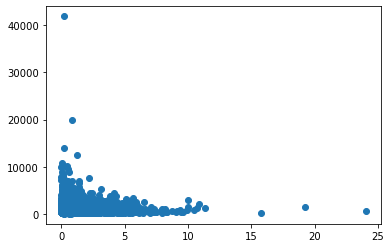

In [2433]:
#plot reviews aghainst the price
plt.scatter(dataset['reviews_per_month'], dataset['price'])

Remove the outliers 

In [2434]:
#check how many values are larger than 20000 and less than 100
print(len(dataset[dataset['price'] > 15000]))
print(len(dataset[dataset['price'] < 150]))
#removie outliers
#remove data with price > 20000 and price < 100
#dataset = dataset[dataset['price'] < 15000]
#dataset = dataset[dataset['price'] > 100]

5
2


Text(0, 0.5, 'price')

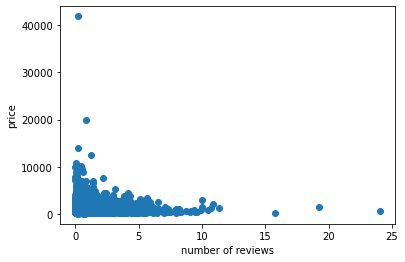

In [2435]:
#plot reviews aghainst the price and name the axis with the clean data
plt.scatter(dataset['reviews_per_month'], dataset['price'])
plt.xlabel('number of reviews')
plt.ylabel('price')


<AxesSubplot:xlabel='neighbourhood'>

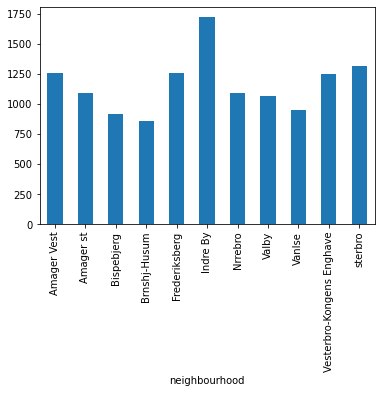

In [2436]:
#make histogram for average price in each neighborhood
dataset.groupby('neighbourhood')['price'].mean().plot(kind='bar')

We want to predict weather the price is low so we start by defining what is a low price
We decide that a low price is a price that is lower than the median price of housing

In [2437]:
#define a low price threshold
#we will use the median price as the threshold for low price
low_price_threshold = dataset['price'].median()
#this means low price is lower than the median price

make a plot with houses more expensive than the threshold red and less expensive as green

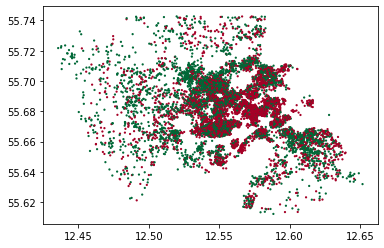

In [2438]:
#make a scatter plot from longitude and latitude with green dots if the price is lower than the median price and red dots if the price is higher than the median price
plt.scatter(dataset['longitude'], dataset['latitude'], c=dataset['price']<low_price_threshold, cmap='RdYlGn', alpha=1, edgecolors='none',s=5)


want to see how many listings are more expensive and how many listings are less expensive than the median benchmark

In [2439]:
#check how many listings are below the threshold
low_price = dataset[dataset['price'] < low_price_threshold]
print('There are {} listings below the threshold'.format(len(low_price)))
#check how many listings are above the threshold
high_price = dataset[dataset['price'] > low_price_threshold]
print('There are {} listings above the threshold'.format(len(high_price)))

There are 4479 listings below the threshold
There are 4482 listings above the threshold


We see that the dataset is pretty evenly split

Now we want to predict weather the price will be low or high

In [2440]:
#prepare the dataset for classification
#we will use the price as the target variable

#step 1: create a new column called 'low_price'
#step 2: assign 1 to the low price and 0 to the high price
dataset['low_price'] = np.where(dataset['price'] < low_price_threshold, 1, 0)



Now we create the model

In [2441]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression(max_iter=100000)

Now we have a empty model
Start by creating a test set with (2/3) of the data and training set with the remaining (1/3)

In [2442]:
#create the training and testing sets
#we will use 2/3 of the data for training and 1/3 for testing
split = int(len(dataset)*2/3)
train = dataset[:split]
test = dataset[split:]

Make dummy variables

In [2443]:
#make dummy variables for neighbourhood and room type
train = pd.get_dummies(train, columns=['neighbourhood','room_type'])
test = pd.get_dummies(test, columns=['neighbourhood','room_type'])

Now we want to pick the x and y for the sets.
Y is the stress variable in this case and x are almost all other columns
start by taking a look at the other columns

In [2444]:
train.columns

Index(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'low_price',
       'neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [2445]:
test.head().T

,10246,10247,10250,10251,10252
id,594581234205365141,594611857554778787,594750876141494330,594776240518859379,594798397908003911
name,Beautiful waterfront apartment with two balconys.,Beautiful space in historic City Center building,Apartment in the heart of trendy Nørrebro,Cozy apartment in Copenhagen’s hippest area,Lækker lejlighed i Carlsbergbyen på Vesterbro
host_id,72762323,400037748,19457000,165581480,24329854
host_name,Siri,Frederikke,Harprit,Nathalie,Kamilla Hedegaard
latitude,55.65838,55.67646,55.69146,55.69247,55.66666
longitude,12.56113,12.576235,12.56275,12.55947,12.53223
price,1350,1357,850,950,1500
minimum_nights,5,5,2,5,2
number_of_reviews,2,4,3,3,4
last_review,2022-08-23,2022-08-14,2022-06-06,2022-08-14,2022-07-20


Make the x- and x/y_train,y/y_test with useful predictors

In [2446]:
#create a list of features we intend to use
base_list = ['reviews_per_month','calculated_host_listings_count','neighbourhood_Amager Vest', 'neighbourhood_Amager st',
       'neighbourhood_Bispebjerg', 'neighbourhood_Brnshj-Husum','calculated_host_listings_count',
       'neighbourhood_Frederiksberg', 'neighbourhood_Indre By',
       'neighbourhood_Nrrebro', 'neighbourhood_Valby', 'neighbourhood_Vanlse',
       'neighbourhood_Vesterbro-Kongens Enghave', 'neighbourhood_sterbro',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room']
x_train = train[base_list]
x_test = test[base_list]

y_train = train['low_price']

y_test=test['low_price']

In [2447]:
x_train[:5].T

,1,2,3,5,6
reviews_per_month,0.55,2.06,0.16,0.54,0.05
calculated_host_listings_count,1.00,3.00,1.00,2.00,1.00
neighbourhood_Amager Vest,0.00,0.00,0.00,0.00,0.00
neighbourhood_Amager st,0.00,0.00,0.00,0.00,0.00
neighbourhood_Bispebjerg,0.00,0.00,0.00,0.00,0.00
neighbourhood_Brnshj-Husum,0.00,0.00,0.00,0.00,0.00
calculated_host_listings_count,1.00,3.00,1.00,2.00,1.00
neighbourhood_Frederiksberg,0.00,0.00,0.00,0.00,0.00
neighbourhood_Indre By,1.00,1.00,0.00,0.00,0.00
neighbourhood_Nrrebro,0.00,0.00,0.00,0.00,0.00


In [2448]:
y_train = train['low_price']

y_test = test['low_price']

In [2449]:
#remove nan values
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)
#use logistic regression to train the model
LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

Check the accuracy of the model

In [2450]:
print(LogReg.score(x_test,y_test))
print(LogReg.score(x_train, y_train))

0.6461538461538462
0.6624853654457267


Since both values are close the model is most likely not overfitting

Next we want to check the confusion matrix

In [2451]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = LogReg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 863  585]
 [ 473 1069]]


Make a more graphical verison

<AxesSubplot:>

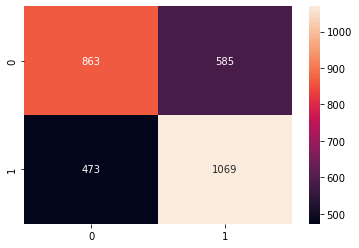

In [2452]:
#visualize the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

In [2453]:
#calculate the f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6689612015018774

In [2454]:
#improve the model
